In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [100]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

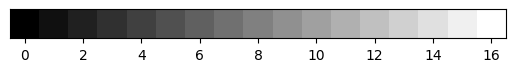

In [101]:
arr = [range(0, 17)]
plt.imshow(arr, cmap='gray')
plt.yticks([])
plt.show()

In [102]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [103]:
digits.data.shape

(1797, 64)

In [104]:
digits.target.shape

(1797,)

Двовимірний масив, що представляє зображення зразка 13

In [105]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

Одновимірний масив, що представляє зображення зразка 13

In [106]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [107]:
def plot_digits(row, col):
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(col, row))
    for item in zip(axes.ravel(), digits.images, digits.target):
        axes, image, target = item
        axes.imshow(image, cmap='gray_r')
        
        axes.set_xticks([])
        axes.set_yticks([])
        
        axes.set_title(target)
    
    plt.tight_layout()

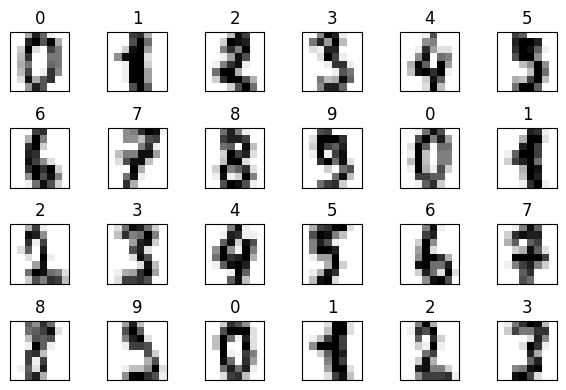

In [108]:
plot_digits(4, 6)

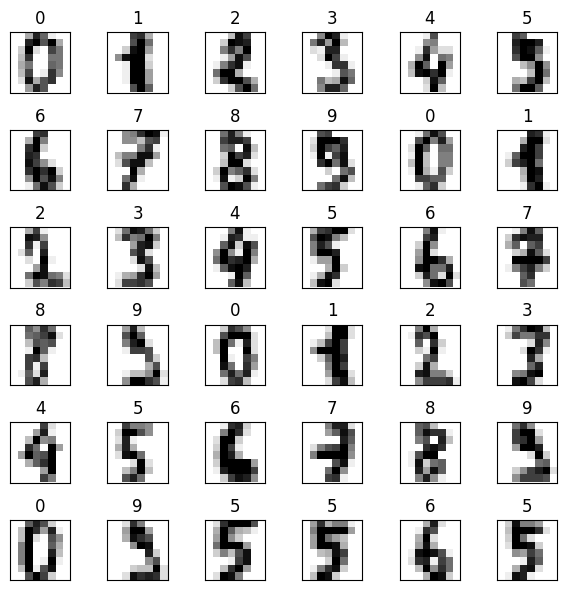

In [109]:
plot_digits(6, 6)

Готуємо дані для моделей

In [110]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.20)

In [111]:
X_train.shape

(1437, 64)

In [112]:
X_test.shape

(360, 64)

In [113]:
nums = [str(digit) for digit in digits.target_names]
nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [115]:
predicted = knn.predict(X=X_test)
expected = y_test

In [116]:
predicted[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [117]:
expected[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [118]:
print(f'{knn.score(X_test, y_test):.4%}')

98.6111%


In [119]:
knn_conf = confusion_matrix(y_true=expected, y_pred=predicted)
knn_conf

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

In [120]:
print(classification_report(expected, predicted, target_names=nums))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [121]:
del predicted, expected, knn_conf, knn

Гіперпараметр K

In [122]:
n = range(1, 21)

In [123]:
accuracy = []
for i in n:
    knn = (KNeighborsClassifier(n_neighbors=i)
           .fit(X_train, y_train))
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

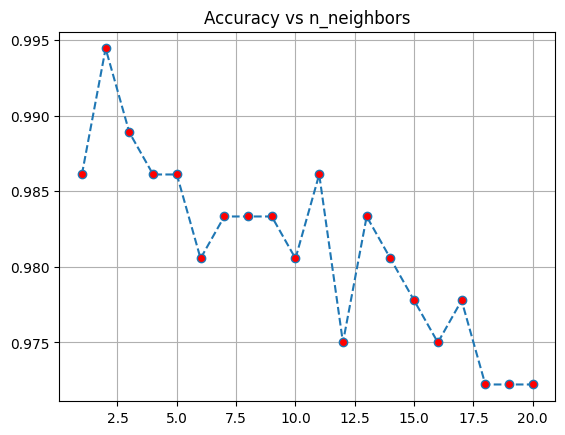

In [124]:
plt.plot(n,
         accuracy,
         linestyle='dashed',
         marker='o',
         markerfacecolor='red')
plt.title('Accuracy vs n_neighbors')
plt.grid()
plt.show()

In [152]:
low_k = accuracy.index(min(accuracy))+1
print(f"Min accuracy ({min(accuracy):.4f}), when n_neighbors = {low_k}")

Min accuracy (0.9722), when n_neighbors = 18


In [153]:
high_k = accuracy.index(max(accuracy))+1
print(f"Max accuracy ({max(accuracy):.4f}), when n_neighbors = {high_k}")

Max accuracy (0.9944), when n_neighbors = 2


In [154]:
knn = KNeighborsClassifier(n_neighbors=high_k).fit(X_train, y_train)
predicted = knn.predict(X=X_test)
expected = y_test

In [155]:
print(f'{knn.score(X_test, y_test):.4%}')

99.4444%


In [156]:
knn_conf = confusion_matrix(y_true=expected, y_pred=predicted)
knn_conf

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

In [157]:
print(classification_report(expected, predicted, target_names=nums))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        41
           4       0.98      1.00      0.99        41
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [159]:
del predicted, expected, knn_conf, knn

In [161]:
knn = KNeighborsClassifier(n_neighbors=low_k).fit(X_train, y_train)
predicted = knn.predict(X=X_test)
expected = y_test

In [162]:
print(f'{knn.score(X_test, y_test):.4%}')

97.2222%


In [163]:
knn_conf = confusion_matrix(y_true=expected, y_pred=predicted)
knn_conf

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  3,  1, 32]])

In [164]:
print(classification_report(expected, predicted, target_names=nums))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       1.00      0.98      0.99        41
           5       0.93      1.00      0.96        27
           6       0.97      1.00      0.98        30
           7       0.88      1.00      0.94        36
           8       0.97      0.94      0.96        34
           9       1.00      0.86      0.93        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [135]:
del predicted, expected, knn_conf, knn

SVC

In [136]:
svc = SVC().fit(X_train, y_train)

In [137]:
predicted = svc.predict(X=X_test)
expected = y_test

In [138]:
predicted[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [139]:
expected[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [140]:
print(f'{svc.score(X_test, y_test):.4%}')

98.6111%


In [141]:
svc_conf = confusion_matrix(y_true=expected, y_pred=predicted)
svc_conf

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 36]])

In [142]:
print(classification_report(expected, predicted, target_names=nums))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.93      0.96        41
           4       1.00      1.00      1.00        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      0.97      0.96        36
           8       0.97      1.00      0.99        34
           9       0.97      0.97      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [143]:
del predicted, expected

GaussianNB

In [144]:
gauss = GaussianNB().fit(X_train, y_train)

In [145]:
predicted = gauss.predict(X=X_test)
expected = y_test

In [146]:
predicted[:36]

array([0, 4, 7, 9, 3, 8, 4, 1, 5, 0, 7, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 4,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [147]:
expected[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [148]:
print(f'{gauss.score(X_test, y_test):.4%}')

85.5556%


In [149]:
gauss_conf = confusion_matrix(y_true=expected, y_pred=predicted)
gauss_conf

array([[36,  0,  0,  0,  1,  0,  0,  1,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  1,  3,  2],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  1,  0, 33,  0,  2,  0,  2,  3,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  1,  0,  1,  0,  4, 25,  0],
       [ 1,  2,  0,  0,  1,  0,  0,  8,  3, 22]])

In [150]:
print(classification_report(expected, predicted, target_names=nums))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.82      0.84      0.83        37
           2       0.97      0.87      0.92        39
           3       0.97      0.80      0.88        41
           4       0.92      0.88      0.90        41
           5       0.90      1.00      0.95        27
           6       1.00      0.93      0.97        30
           7       0.63      1.00      0.77        36
           8       0.66      0.74      0.69        34
           9       0.92      0.59      0.72        37

    accuracy                           0.86       360
   macro avg       0.88      0.86      0.86       360
weighted avg       0.88      0.86      0.86       360



In [151]:
del predicted, expected